In [1]:
!pip install lightkurve

import lightkurve as lk
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.8/201.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 100.9 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=26a6555d6ff74ad3d8c0170b73ad4c0453d9a7cfa14cf9ff0bafbaa4fea6b6ed
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization

/usr/local/lib/python3.12/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
search_result = lk.search_lightcurve( "Kepler-69", author="Kepler", quarter=10)
print(search_result)

SearchResult containing 1 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 10 2011 Kepler    1800 kplr008692861      0.0


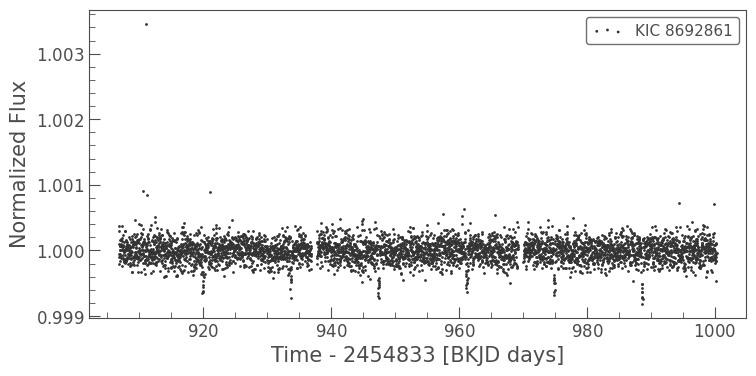

In [3]:
lc = search_result.download()

lc = lc.remove_nans().normalize()

lc.scatter()

plt.show()

In [4]:
import pandas as pd
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&format=csv"

data = pd.read_csv(url)
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [5]:
data.koi_disposition.value_counts()

,count
koi_disposition,
FALSE POSITIVE,4839
CONFIRMED,2746
CANDIDATE,1979


In [6]:
data = data[data.koi_disposition != 'CANDIDATE']

data['koi_disposition'].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4839
CONFIRMED,2746


In [7]:
mapping = {'CONFIRMED': 1, 'FALSE POSITIVE': 0}

data['label'] = data['koi_disposition'].map(mapping)
print(data.head())


      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
5  10872983  K00756.01  Kepler-228 d       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   
5      1.000              0              0              0              0  ...   

   koi_slogg_err1  koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2 

In [8]:
feature_names = ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
                 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr']

X = data[feature_names]
y = data['label']

print(X.head())

   koi_period  koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  \
0    9.488036   170.538750       0.146       2.95750      615.8      2.26   
1   54.418383   162.513840       0.586       4.50700      874.8      2.83   
3    1.736952   170.307565       1.276       2.40641     8079.2     33.46   
4    2.525592   171.595550       0.701       1.65450      603.3      2.75   
5   11.094321   171.201160       0.538       4.59450     1517.5      3.90   

   koi_teq  koi_insol  koi_model_snr  
0    793.0      93.59           35.8  
1    443.0       9.11           25.8  
3   1395.0     891.96          505.6  
4   1406.0     926.16           40.9  
5    835.0     114.81           66.5  


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(6068, 9)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Training complete")

Training complete


In [11]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print("Model Accuracy: ", score * 100, "%")

Model Accuracy:  91.6941331575478 %


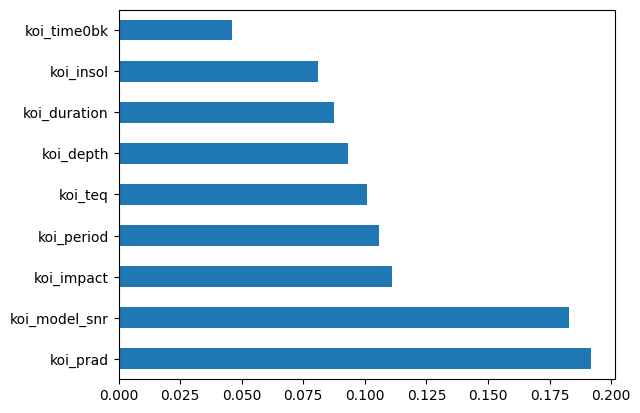

In [12]:
import matplotlib.pyplot as plt

features_importances = pd.Series(model.feature_importances_, feature_names)

features_importances.nlargest(10).plot(kind='barh')

plt.show()

In [13]:
import joblib

filename = 'planet_finder_model.joblib'
joblib.dump(model, filename)

print(f"Success! Model saved as {filename}")


Success! Model saved as planet_finder_model.joblib


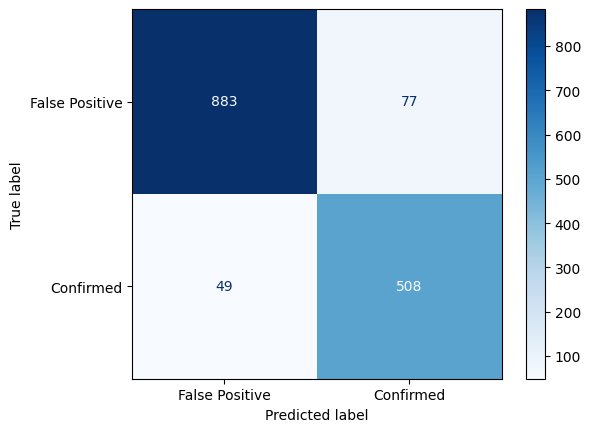

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False Positive', 'Confirmed'])
disp.plot(cmap='Blues')
plt.show()



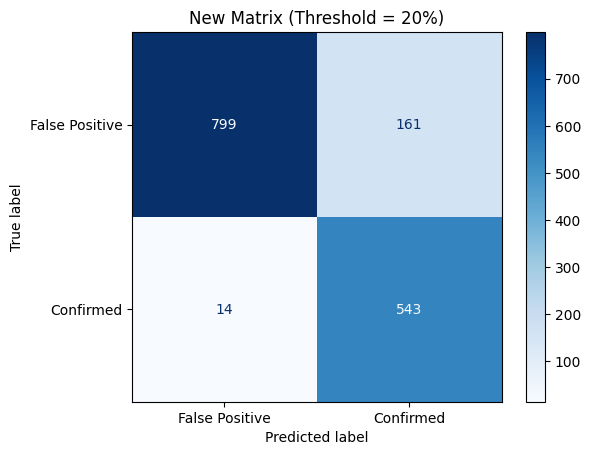

In [15]:
probs = model.predict_proba(X_test)[:,1]

new_predictions = (probs > 0.20)

cm = confusion_matrix(y_test, new_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False Positive', 'Confirmed'])
disp.plot(cmap='Blues')
plt.title("New Matrix (Threshold = 20%)")
plt.show()


In [16]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = model.predict(X_test)

mistakes = results[ (results['Actual'] == 0) & (results['Predicted'] == 1) ]

print(f"Found {len(mistakes)} mysterious candidates.")
mistakes.head()



Found 77 mysterious candidates.


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,Actual,Predicted
697,3.125814,356.411840,0.506,1.7895,238.8,1.88,1460.0,1073.04,32.0,0,1
347,4.618768,133.386535,0.766,5.9957,4399.1,7.48,1170.0,442.78,270.1,0,1
3620,6.971069,174.703050,0.044,3.9125,452.8,2.07,946.0,189.16,41.7,0,1
6723,5.297308,135.556810,0.728,4.0200,190.8,1.49,1044.0,281.21,13.1,0,1
7871,11.931380,142.823660,0.412,3.6390,122.1,0.56,415.0,7.00,14.7,0,1


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'n_estimators': 200}


In [21]:
best_model = grid_search.best_estimator_

new_accuracy = best_model.score(X_test, y_test)

print(f"Old Accuarcy: 92.00%")
print(f"New Accuracy: {new_accuracy * 100:.2f}%")

Old Accuarcy: 92.00%
New Accuracy: 91.89%


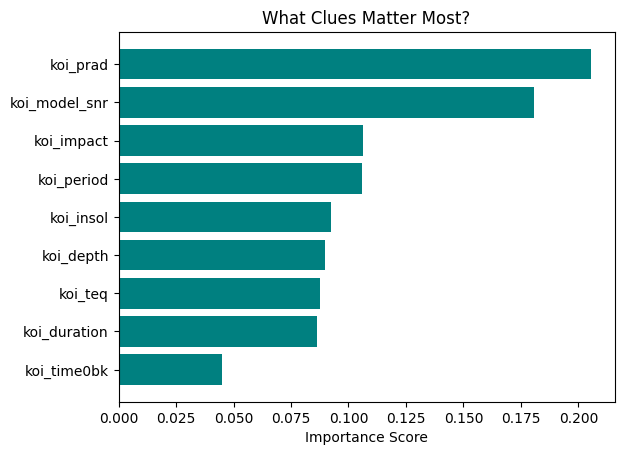

In [26]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_

sorted_indices = importances.argsort()

plt.title("What Clues Matter Most?")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='teal')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel("Importance Score")
plt.show()


In [27]:
import joblib

# 1. Save the model to a file
joblib.dump(best_model, 'planet_hunter_v1.pkl')

print("Model saved successfully! Check your files folder on the left.")

Model saved successfully! Check your files folder on the left.
